# 50 Years 50 Prolific Authors in Remote Sensing of Environment 

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read original data
df = pd.read_csv('rse/result.csv')
df.head()

,author,year,volume
0,K.T Kriebel,1979,8
1,"G.F Byrne, J.E Begg, P.M Fleming, F.X Dunin",1979,8
2,"R.B Pollock, E.T Kanemasu",1979,8
3,"Stanley R Schneider, David F McGinnis, John A ...",1979,8
4,Janice P Darch,1979,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 3 columns):
author    6781 non-null object
year      6781 non-null int64
volume    6781 non-null int64
dtypes: int64(2), object(1)
memory usage: 159.0+ KB


Remote Sensing of Environment (1969 - 2019)

In [4]:
df.describe()

,year,volume
count,6781.000000,6781.000000
mean,2005.937767,115.154992
std,11.431596,61.519973
min,1969.000000,1.000000
25%,2000.000000,71.000000
50%,2010.000000,114.000000
75%,2015.000000,164.000000
max,2019.000000,231.000000


In [5]:
# get the first, second and third author
authors = df.author.str.split(', ', 3, expand=True)

In [6]:
df[['first_author', 'second_author', 'third_author']] = authors[[0, 1, 2]]
df.head()

,author,year,volume,first_author,second_author,third_author
0,K.T Kriebel,1979,8,K.T Kriebel,None,None
1,"G.F Byrne, J.E Begg, P.M Fleming, F.X Dunin",1979,8,G.F Byrne,J.E Begg,P.M Fleming
2,"R.B Pollock, E.T Kanemasu",1979,8,R.B Pollock,E.T Kanemasu,None
3,"Stanley R Schneider, David F McGinnis, John A ...",1979,8,Stanley R Schneider,David F McGinnis,John A Pritchard
4,Janice P Darch,1979,8,Janice P Darch,None,None


In [7]:
new_df = df.drop('author', axis=1)
new_df.head()

,year,volume,first_author,second_author,third_author
0,1979,8,K.T Kriebel,None,None
1,1979,8,G.F Byrne,J.E Begg,P.M Fleming
2,1979,8,R.B Pollock,E.T Kanemasu,None
3,1979,8,Stanley R Schneider,David F McGinnis,John A Pritchard
4,1979,8,Janice P Darch,None,None


In [8]:
# wide to long format
long_df = pd.melt(new_df, 
                  id_vars=['year','volume'], 
                  value_vars=['first_author', 'second_author', 'third_author'], 
                  var_name='order_author', 
                  value_name='name_author'
                 )
long_df.head()

,year,volume,order_author,name_author
0,1979,8,first_author,K.T Kriebel
1,1979,8,first_author,G.F Byrne
2,1979,8,first_author,R.B Pollock
3,1979,8,first_author,Stanley R Schneider
4,1979,8,first_author,Janice P Darch


In [9]:
# count number of publications by author
count_pub = long_df.groupby('name_author').count()
# clean count data frame
count_pub = count_pub.drop(['volume', 'order_author'], axis=1).rename(columns={'year': 'count'})
# sort from high to low
ordered_df = count_pub.sort_values('count', ascending=False)
ordered_df.head()

,count
name_author,
Chuanmin Hu,48
Nicholas C. Coops,46
Dar A. Roberts,41
Shunlin Liang,39
Michael A. Wulder,37


In [10]:
# rank authors based on count
ordered_df['rank']=ordered_df['count'].rank(method='min', ascending=False)
ordered_df.head()

,count,rank
name_author,,
Chuanmin Hu,48,1.0
Nicholas C. Coops,46,2.0
Dar A. Roberts,41,3.0
Shunlin Liang,39,4.0
Michael A. Wulder,37,5.0


In [11]:
# get top 50 authors with highest count values
top_author = ordered_df[ordered_df['rank']<=50]

## Top 50 Prolific Authors in Remote Sensing Environment (1969 - 2019)

Only first 3 authors of each article were considered in the calculation.

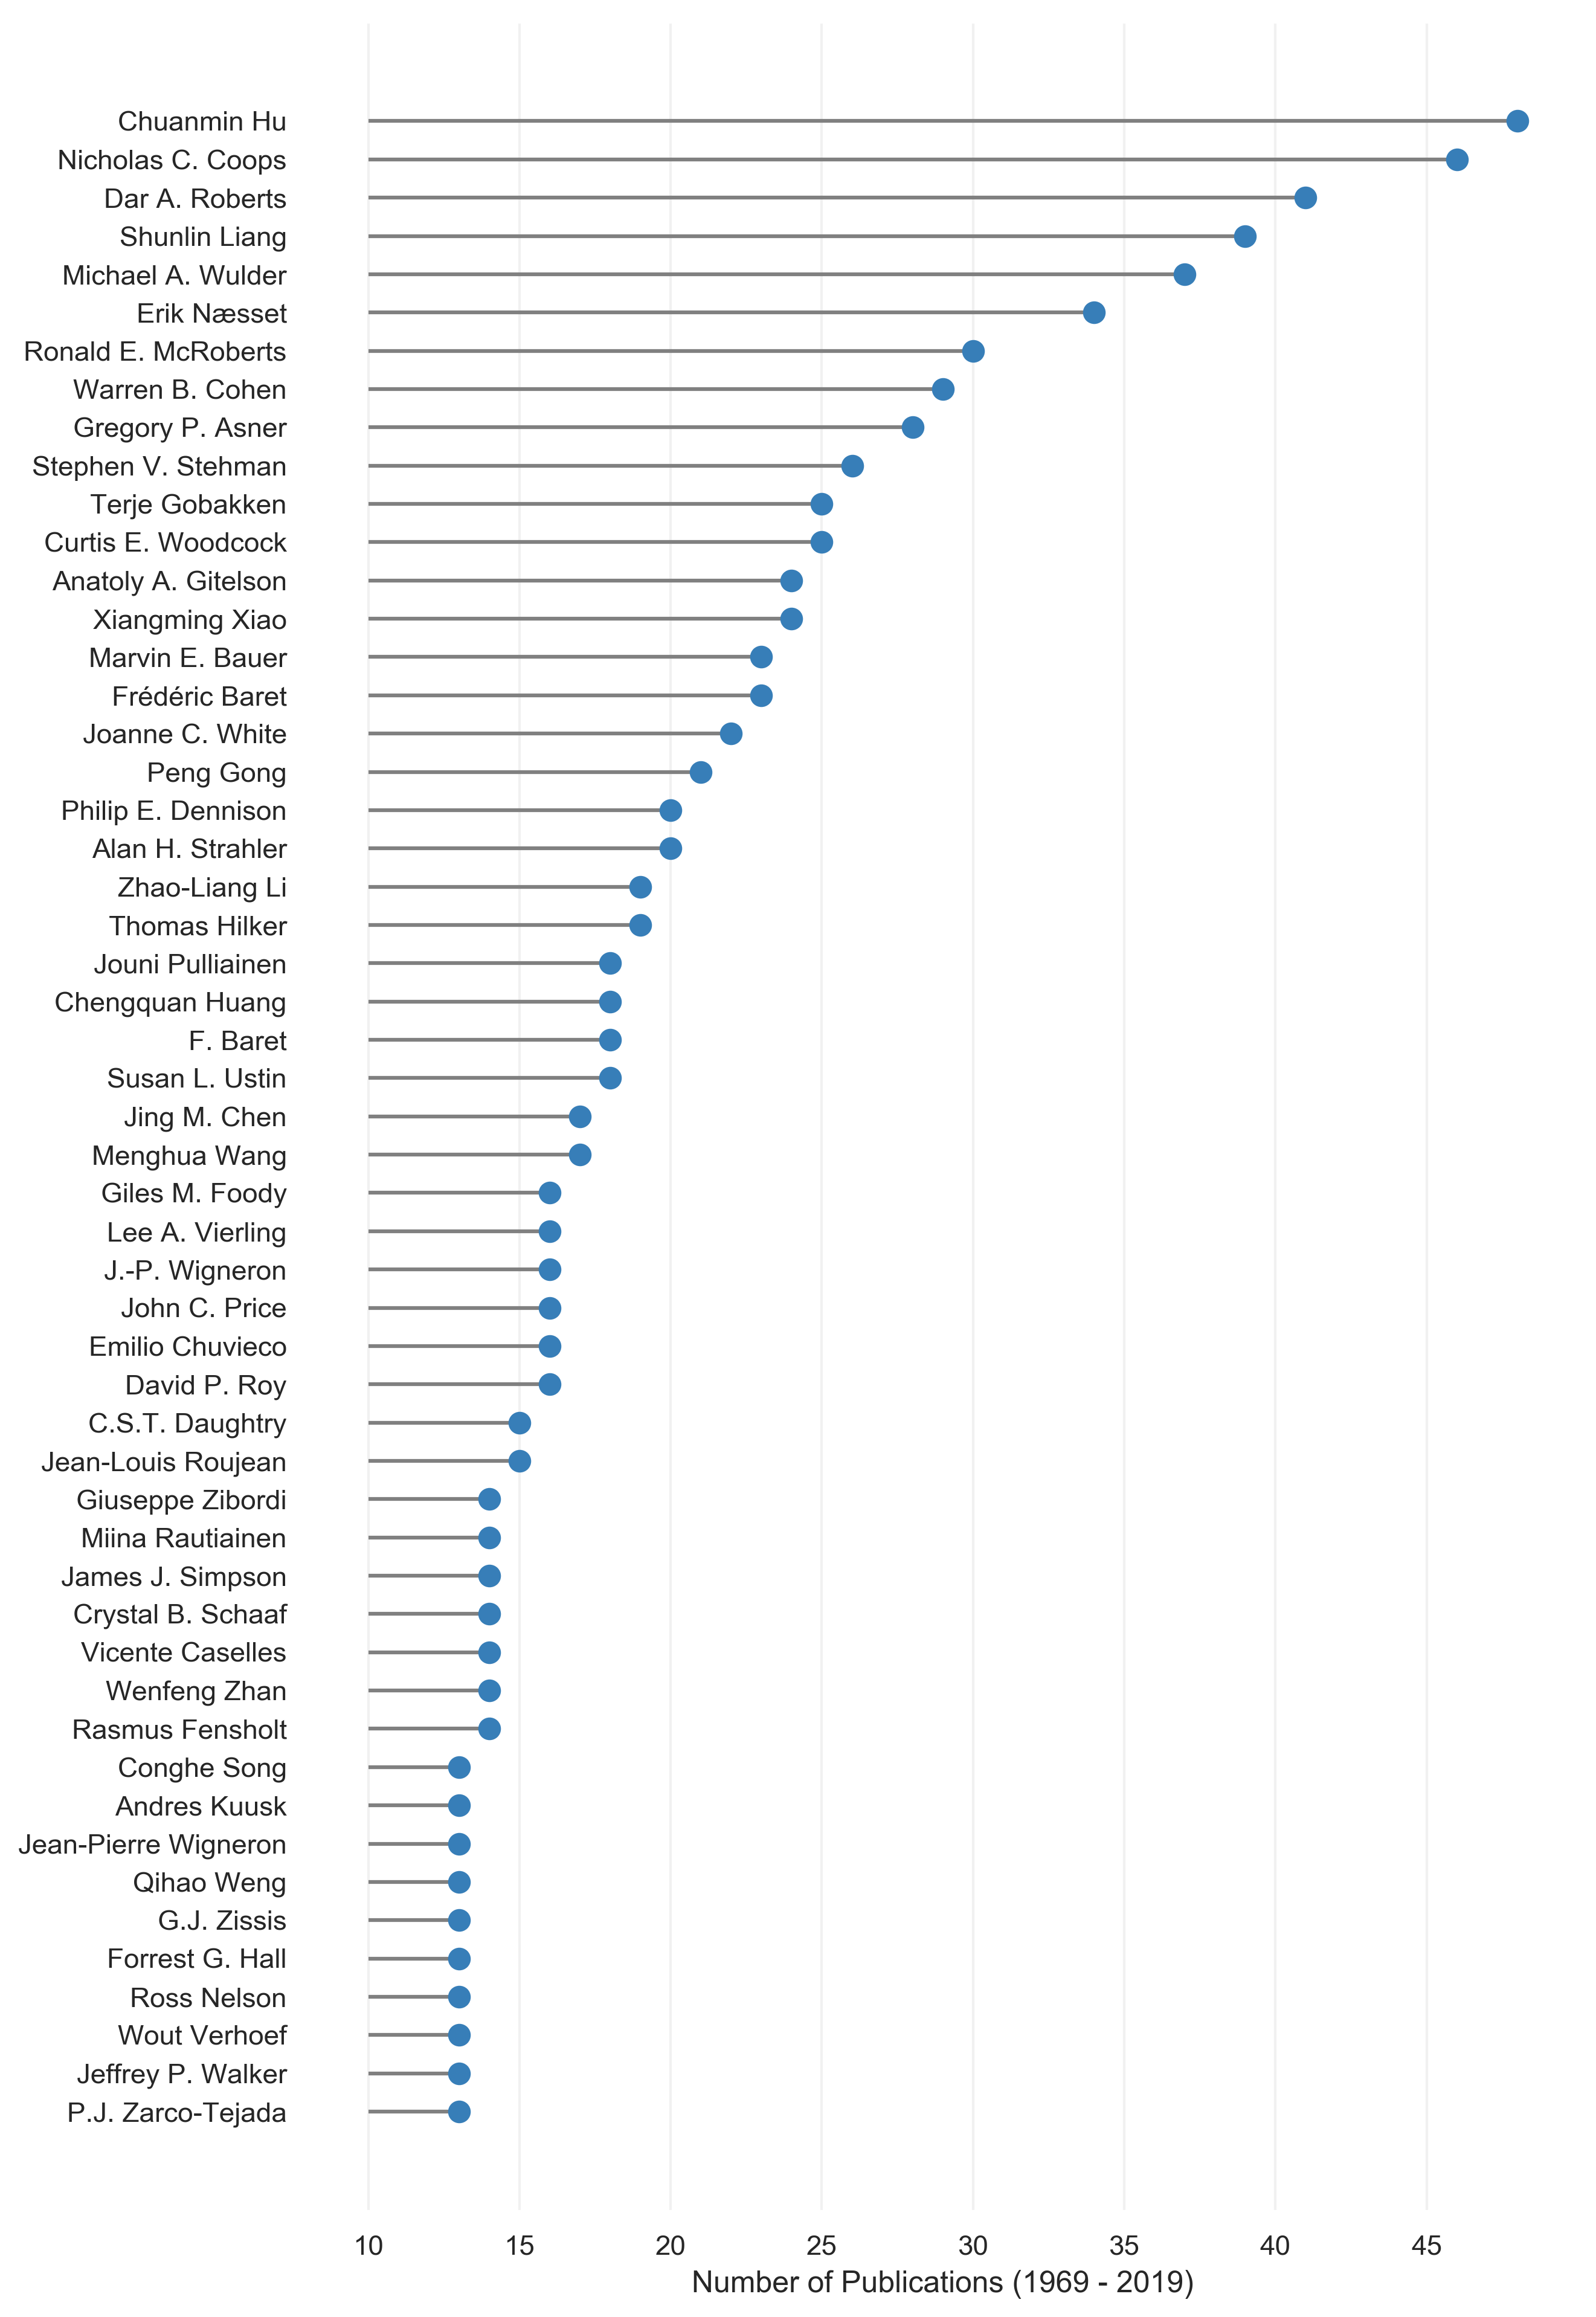

In [12]:
# change plot setting
sns.set()
plt.rcParams['grid.color'] = '#f1f1f1'
plt.rcParams['axes.facecolor'] = 'white'

# plot size
plt.figure(figsize=(9,16),dpi=300)

my_range=range(1,len(top_author.index)+1)
# lollipop
plt.hlines(y=my_range, xmin=10, xmax=top_author[['count']].sort_values('count'), color='grey')
plt.plot(top_author[['count']].sort_values('count'), my_range, 'o', color='#377EB8', markersize=8)
plt.grid(None,axis='y')

# add titles and axis names
plt.yticks(my_range, top_author[['count']].sort_values('count').index)
plt.xlabel('Number of Publications (1969 - 2019)')

plt.savefig('top-50-author.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# get first author inforamtion
first_author = long_df[long_df['order_author']=='first_author']
first_author.head()

,year,volume,order_author,name_author
0,1979,8,first_author,K.T Kriebel
1,1979,8,first_author,G.F Byrne
2,1979,8,first_author,R.B Pollock
3,1979,8,first_author,Stanley R Schneider
4,1979,8,first_author,Janice P Darch


In [13]:
# count number of publications by first author
count_first = first_author.groupby('name_author').count()
count_first = count_first.drop(['volume', 'order_author'], axis=1).rename(columns={'year': 'count'})
# sort from high to low
ordered_first = count_first.sort_values('count', ascending=False)
ordered_first.head()

,count
name_author,
Ronald E. McRoberts,17
Marvin E. Bauer,17
Erik Næsset,17
John C. Price,16
G.J. Zissis,13


In [14]:
# rank first authors based on count
ordered_first['rank'] = ordered_first['count'].rank(method='min', ascending=False)
ordered_first.head()

,count,rank
name_author,,
Ronald E. McRoberts,17,1.0
Marvin E. Bauer,17,1.0
Erik Næsset,17,1.0
John C. Price,16,4.0
G.J. Zissis,13,5.0


In [15]:
# get top 50 first authors with highest count values
top_fa = ordered_first[ordered_first['rank']<=50]

## Top 50 Prolific First Authors in Remote Sensing of Environment (1969 - 2019)

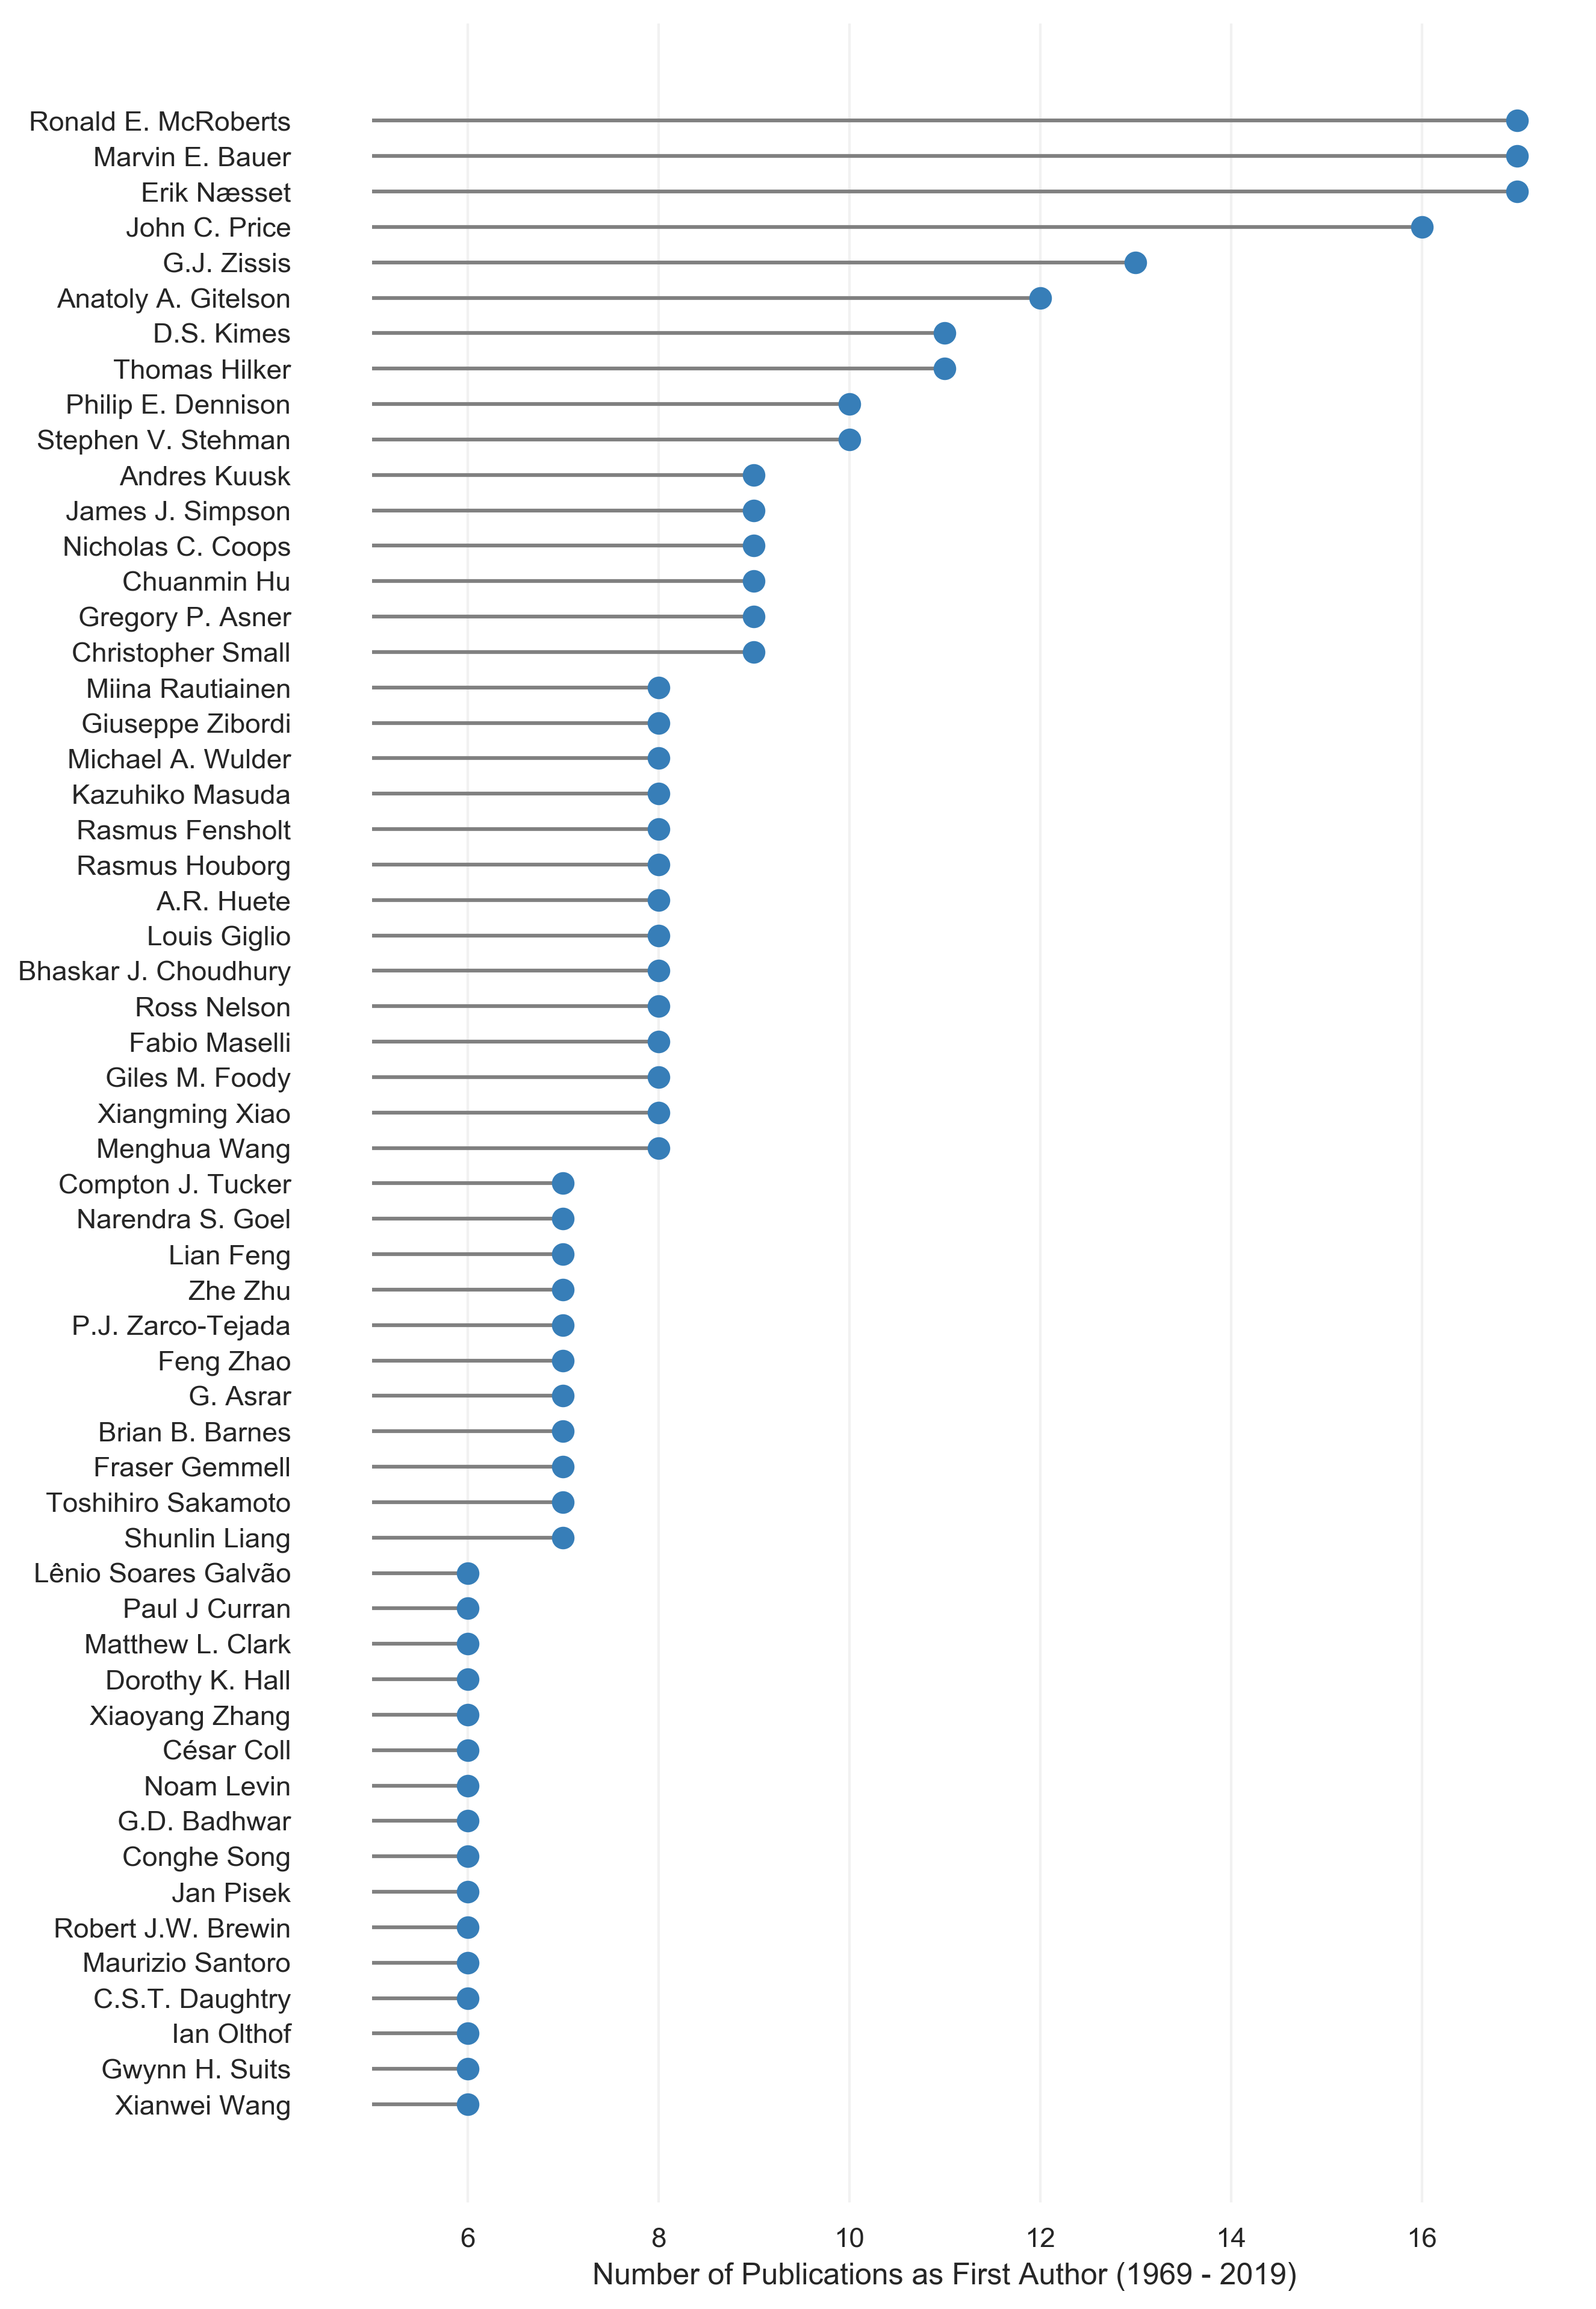

In [17]:
# plot size
plt.figure(figsize=(9,16),dpi=300)

my_range=range(1,len(top_fa.index)+1)
# lollipop
plt.hlines(y=my_range, xmin=5, xmax=top_fa[['count']].sort_values('count'), color='grey')
plt.plot(top_fa[['count']].sort_values('count'), my_range, 'o', color='#377EB8', markersize=8)
plt.grid(None, axis='y')

# add titles and axis names
plt.yticks(my_range, top_fa[['count']].sort_values('count').index)
plt.xlabel('Number of Publications as First Author (1969 - 2019)')

plt.savefig('top-50-first-author.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# get the recent decade author inforamtion
recent_df = long_df[long_df['year']>=2010]

In [17]:
recent_df.head()

,year,volume,order_author,name_author
1896,2010,114,first_author,Junchang Ju
1897,2010,114,first_author,Fred Meier
1898,2010,114,first_author,David P. Roy
1899,2010,114,first_author,Zifeng Wang
1900,2010,114,first_author,Andrew K. Skidmore


In [18]:
# count number of publications by author in the recent decade
count_recent = recent_df.groupby('name_author').count()
count_recent = count_recent.drop(['volume', 'order_author'], axis=1).rename(columns={'year': 'count'})
# sort from high to low
ordered_recent = count_recent.sort_values('count', ascending=False)
ordered_recent.head()

,count
name_author,
Chuanmin Hu,36
Nicholas C. Coops,29
Ronald E. McRoberts,25
Shunlin Liang,24
Michael A. Wulder,23


In [19]:
# rank recent authors based on count
ordered_recent['rank'] = count_recent['count'].rank(method='min', ascending=False)
ordered_recent.head()

,count,rank
name_author,,
Chuanmin Hu,36,1.0
Nicholas C. Coops,29,2.0
Ronald E. McRoberts,25,3.0
Shunlin Liang,24,4.0
Michael A. Wulder,23,5.0


In [20]:
# # get top 50 authors with highest count values in the recent decade
top_recent = ordered_recent[ordered_recent['rank']<=50].reset_index()

In [21]:
top_recent.head()

,name_author,count,rank
0,Chuanmin Hu,36,1.0
1,Nicholas C. Coops,29,2.0
2,Ronald E. McRoberts,25,3.0
3,Shunlin Liang,24,4.0
4,Michael A. Wulder,23,5.0


In [22]:
# get author by year
year_df = recent_df.groupby(['year', 'name_author']).count().reset_index()
year_df = year_df.drop('volume', axis=1).rename(columns={'order_author': 'count'})
year_df.head()

,year,name_author,count
0,2010,A. Camps,1
1,2010,A. Cazenave,1
2,2010,A. Chanzy,1
3,2010,A. Harris,1
4,2010,A. Hénon,1


In [23]:
# get author by year in the recent decade
merged_df = year_df.merge(top_recent, how = 'inner', on = ['name_author'])

In [24]:
# sort from high to low
merged_df = merged_df.sort_values('rank')
merged_df.head()

,year,name_author,count_x,count_y,rank
21,2013,Chuanmin Hu,4,36,1.0
19,2011,Chuanmin Hu,1,36,1.0
18,2010,Chuanmin Hu,1,36,1.0
22,2014,Chuanmin Hu,6,36,1.0
23,2015,Chuanmin Hu,2,36,1.0


In [25]:
# transfer to pivot table
heatmap_data = pd.pivot_table(merged_df, values='count_x', 
                     index=['name_author'], 
                     columns='year')

In [26]:
# reorder author from more publications to less publications
heatmap_data = heatmap_data.reindex(merged_df['name_author'].unique())

In [27]:
# change na to 0
heatmap_data = heatmap_data.fillna(0)

In [28]:
heatmap_data.head()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
name_author,,,,,,,,,,
Chuanmin Hu,1.0,1.0,2.0,4.0,6.0,2.0,6.0,4.0,6.0,4.0
Nicholas C. Coops,3.0,2.0,4.0,3.0,3.0,3.0,1.0,4.0,5.0,1.0
Ronald E. McRoberts,2.0,2.0,2.0,2.0,1.0,3.0,9.0,1.0,3.0,0.0
Shunlin Liang,2.0,1.0,2.0,0.0,3.0,5.0,5.0,0.0,6.0,0.0
Michael A. Wulder,2.0,3.0,3.0,1.0,0.0,6.0,1.0,1.0,3.0,3.0


## Top 50 Prolific Authors in Remote Sensing of Environment Over the Past Decade (2010 - 2019)

Only first 3 authors of each article were considered in the calculation. The figure was ordered (high to low) by the total number of publications over the past decade.

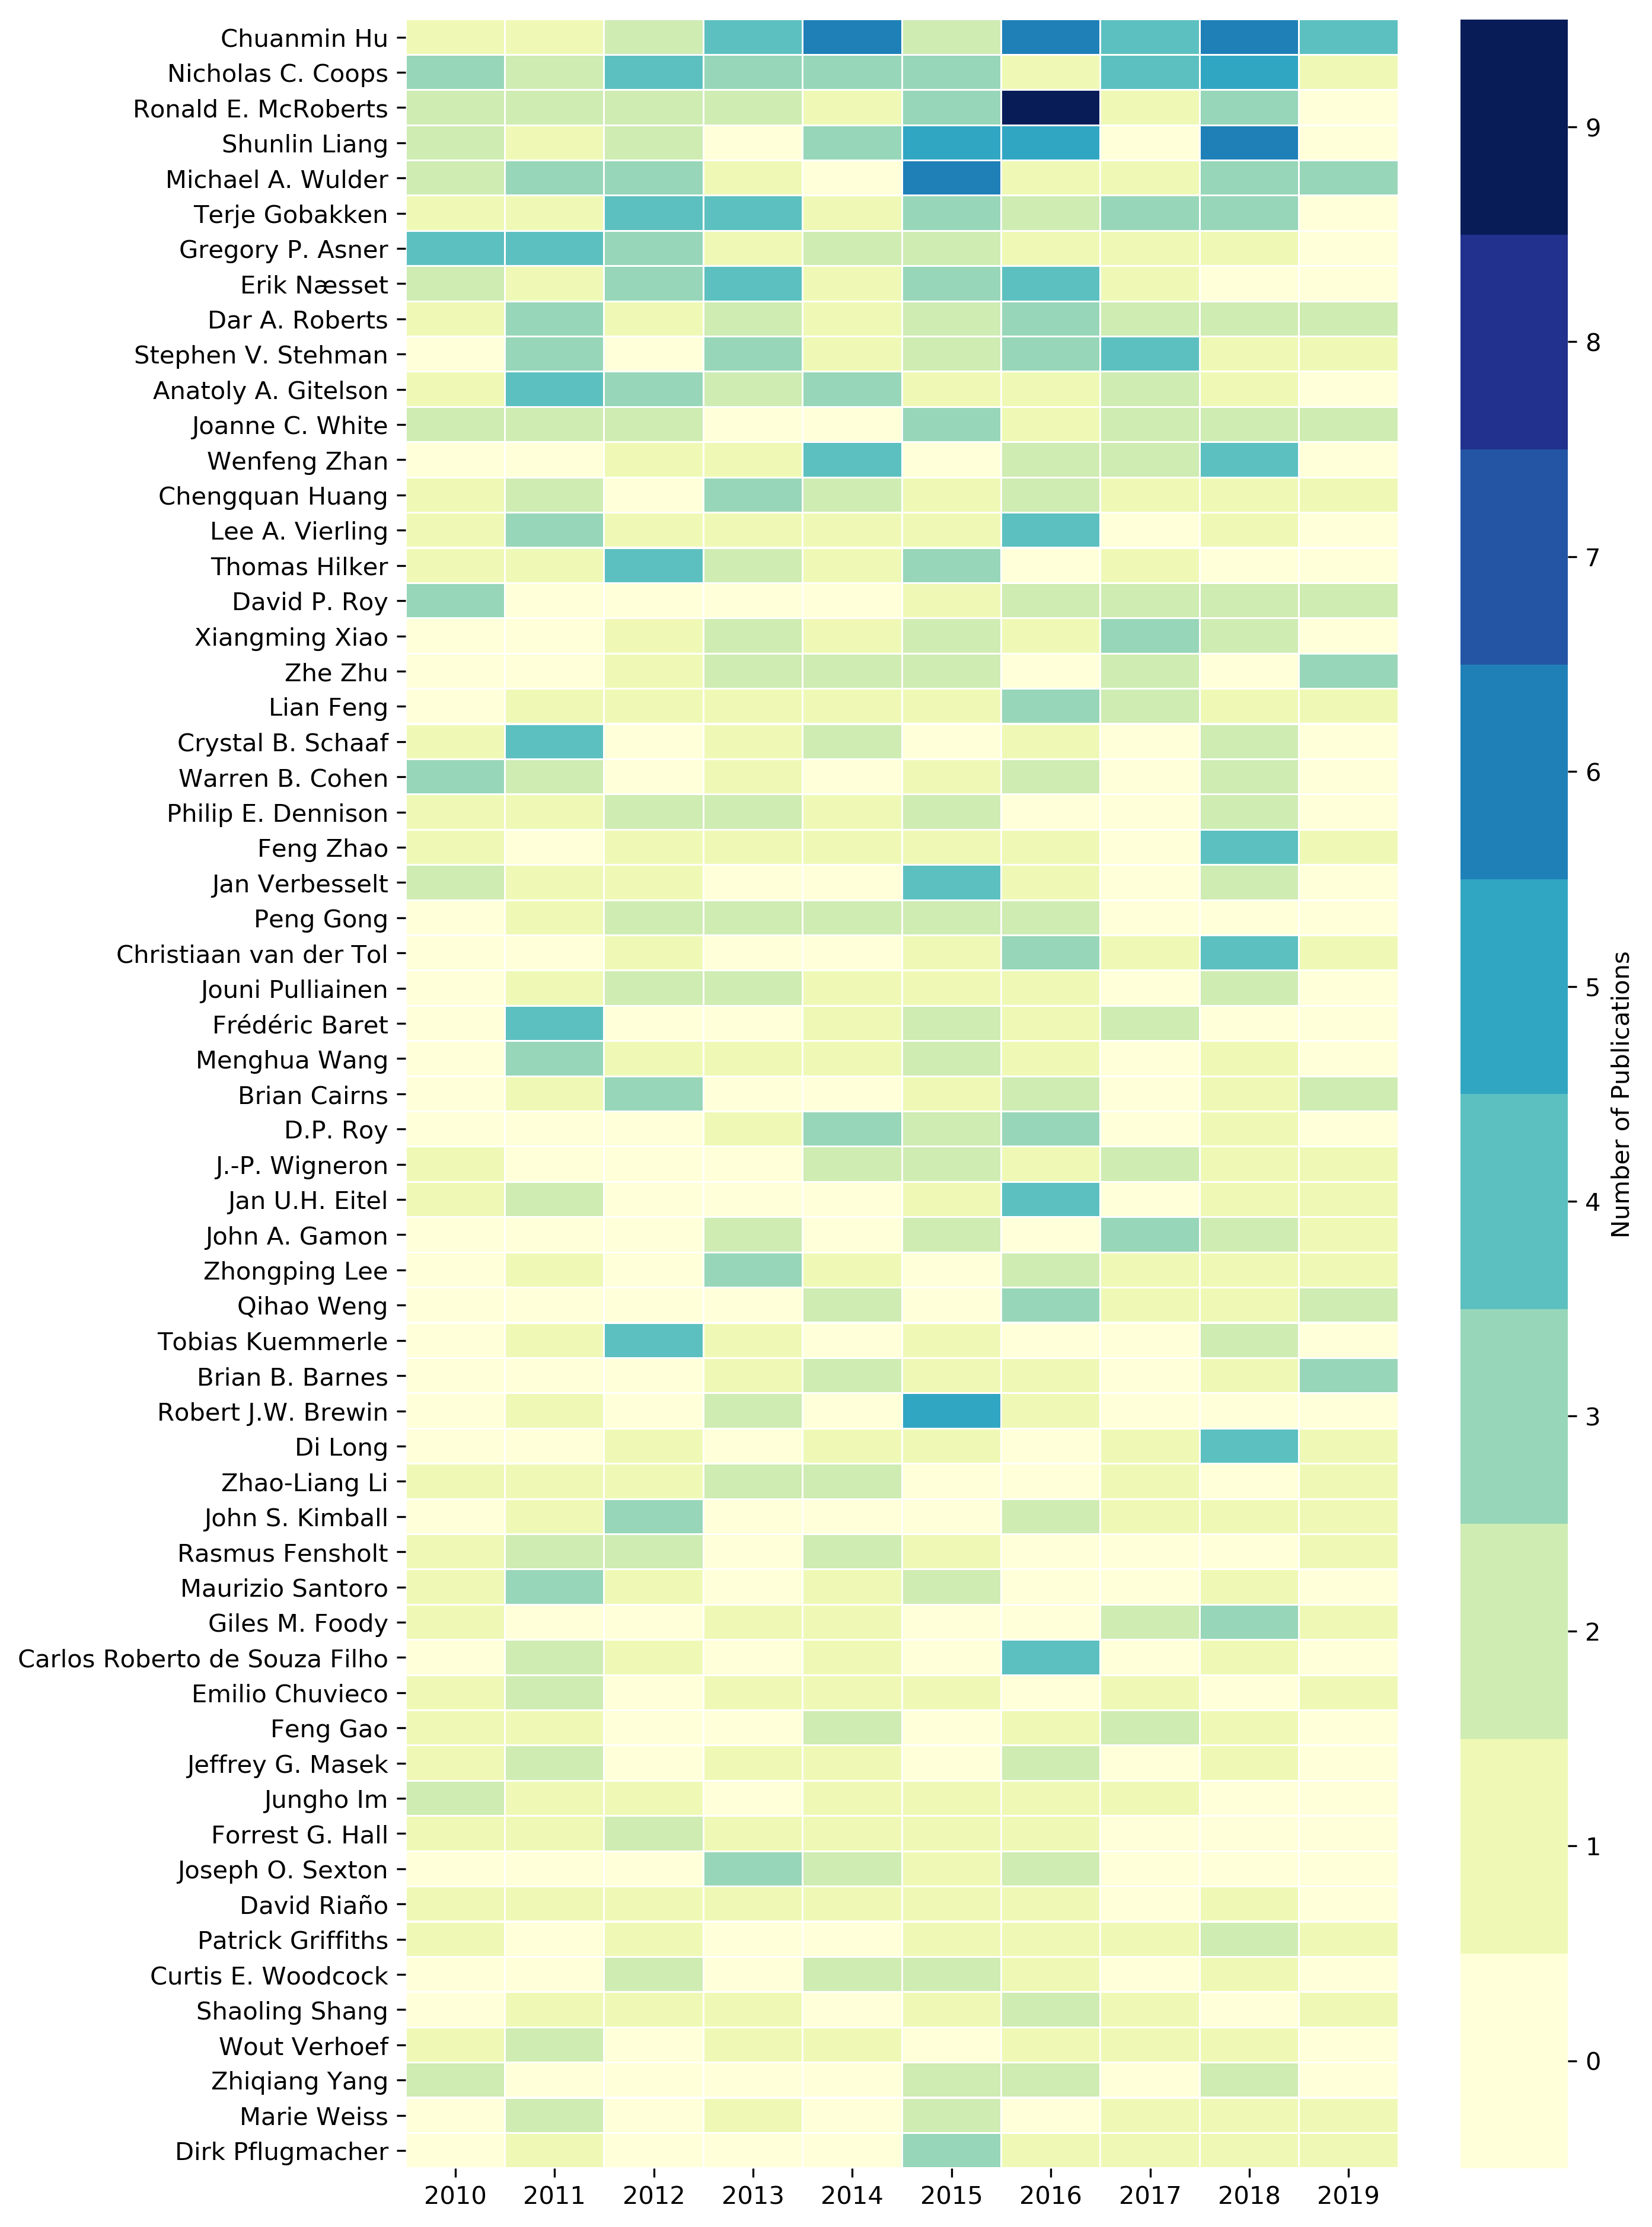

In [29]:
# plot size
plt.figure(figsize=(9,16),dpi=300)

# heatmap 
ax = sns.heatmap(heatmap_data, cmap=plt.cm.get_cmap('YlGnBu', 10), linewidths=.5, vmin=-0.5, vmax=9.5, cbar_kws={'label': 'Number of Publications', 'ticks': range(10)})
ax.set(xlabel='', ylabel='')

plt.savefig('top-50-author-1019.png', dpi=300, bbox_inches='tight')